###### import

In [1]:
import elec_bol20.util as ebu
from elec_bol20 import *

##### code

In [2]:

DCHI = 'CHI20 - CHI19'
DMAS = 'MAS20 - MAS19'
DCRE = 'CRE20 - CRE19'
D21F = '21F20 - 21F19'
DCC = 'CC20 - CC19'
DMAS_M_DCHI = f'({DMAS}) + ({DCHI})'
df20 = ebu.get_dataframe_2020()
df19 = ebu.open_combine_2019()

In [3]:
#join 20 with 19
df = pd.merge(
    df19,df20,left_on='ID_MESA', right_on='ID_MESA',
    suffixes=['_19','_20'],
    # how='inner'
              )
# clean 0 vote tables from last election
df = df[df['VV_19']>0]



In [15]:
df['mas_20'] = df['MAS_20']/df['VV_20']*100
df['mas_19'] = df['MAS_19']/df['VV_19']*100
df[DMAS] = df['mas_20'] - df['mas_19']

df['chi_20'] = df['FPV']/df['VV_20']*100
df['chi_19'] = df['PDC']/df['VV_19']*100
df[DCHI] = df['chi_20'] - df['chi_19']


df['cc_20'] = df['CC_20']/df['VV_20']*100
df['cc_19'] = df['CC_19']/df['VV_19']*100
df[DCC] = df['cc_20'] - df['cc_19']

df['creemos_20'] = df['CREEMOS']/df['VV_20']*100
df['creemos_19'] = 0
df[DCRE] = df['creemos_20'] - df['creemos_19']

df['21f_20'] = 0
df['21f_19'] = df['21F']/df['VV_19']*100
df[D21F] = df['21f_20'] - df['21f_19']
l = len(df)
df['xj'] = df['X_20'] + (np.random.randn(l)-.5) * .002 * np.sqrt(df['DEN_20'])
df['yj'] = df['Y_20'] + (np.random.randn(l)-.5) * .002 * np.sqrt(df['DEN_20'])

In [40]:
from sklearn.cluster import KMeans
cols = [DMAS, DCC, DCRE, D21F,DCHI]
df1=df[[*cols,'xj','yj']].dropna(how='any',axis=0)
N=5
kmeans = KMeans(n_clusters=N).fit(df1[cols])

df1['l'] = kmeans.labels_

In [41]:
df1.groupby('l').sum()

,MAS20 - MAS19,CC20 - CC19,CRE20 - CRE19,21F20 - 21F19,CHI20 - CHI19,xj,yj
l,,,,,,,
0,-10572.253716,44949.732831,25979.318845,-22910.160656,-25401.395476,-302207.064577,-84526.469103
1,5768.129043,-72084.562207,137186.882572,-37975.221375,-22795.493782,-233327.817010,-62193.614312
2,133745.452642,-28140.341670,8244.458848,-11279.851209,-74019.795165,-403950.533860,-101238.650604
3,80473.118512,596.625002,19183.100463,-17134.036130,-58460.422503,-674966.490207,-184011.008707
4,-3818.140601,-145109.294658,199039.687940,-30764.270027,-13463.562083,-195706.711863,-53878.159363


(-250000.0, 400000.0)

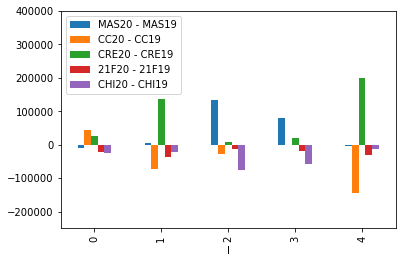

In [42]:
df1.groupby('l')[cols].sum().plot.bar()
plt.gca().set_ylim(-250000,400000)

<AxesSubplot:xlabel='xj', ylabel='yj'>

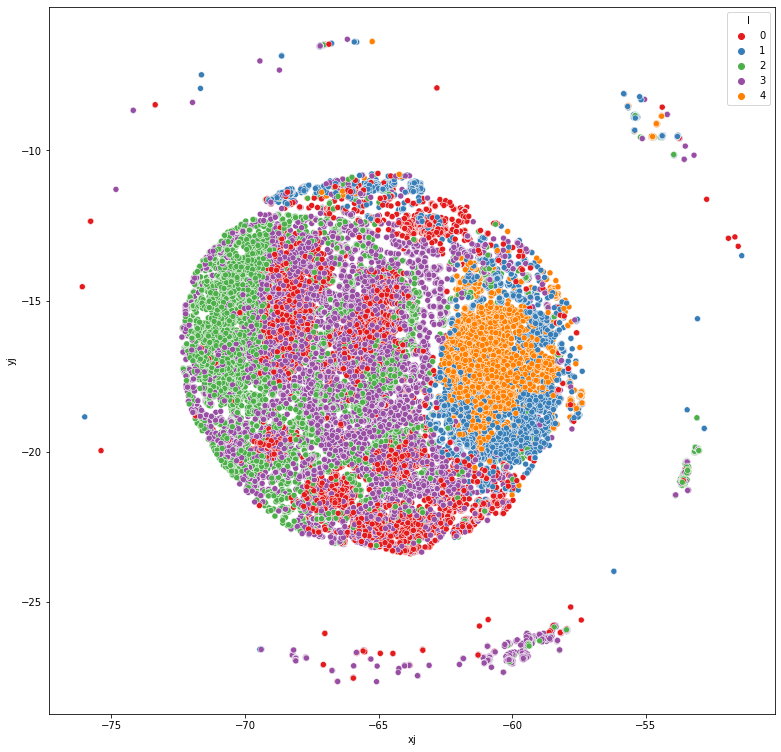

In [43]:

f,ax=plt.subplots(figsize=(13,13))
sns.scatterplot(x='xj',y='yj', data=df1,hue='l',palette=sns.color_palette("Set1")[:N])

In [54]:
nf = pd.DataFrame(kmeans.cluster_centers_,columns=cols)

<AxesSubplot:>

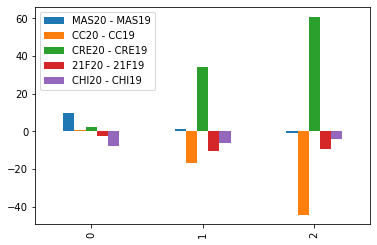

In [55]:
nf.plot.bar()

In [66]:
df[DMAS_M_DCHI] = df[DMAS] + df[DCHI]



df['s'] = np.sqrt(df['HAB_20']/45000)



df = df.sort_values('DEN_20')
PAL = bokeh.palettes.PuOr7
PAL1 = bokeh.palettes.PuOr7
PAL2 = bokeh.palettes.PuOr7
VAR = DCHI
VAR1 = DMAS
VAR2 = DMAS_M_DCHI
CMIN = -20
CMAX = 20
CMIN1 = -20
CMAX1 = 20
CMIN2 = -20
CMAX2 = 20


cols = [
    # 'mas_20','mas_19',
    'xj','yj','s',
    DMAS, DCHI,
    DMAS_M_DCHI
]

HW = 400
f = bokeh.plotting.Figure(width=HW, height=HW, output_backend="webgl")
f1 = bokeh.plotting.Figure(width=HW, height=HW, output_backend="webgl")
f2 = bokeh.plotting.Figure(width=HW, height=HW, output_backend="webgl")

sr = bokeh.plotting.ColumnDataSource(df[cols])

cm = bokeh.transform.linear_cmap(VAR, palette=PAL, low=CMIN, high=CMAX)
cm1 = bokeh.transform.linear_cmap(VAR1, palette=PAL1, low=CMIN1, high=CMAX1)
cm2 = bokeh.transform.linear_cmap(VAR2, palette=PAL2, low=CMIN2, high=CMAX2)
cb = bokeh.models.ColorBar(
    color_mapper=cm['transform'], width='auto',
    location=(0, 1),
    title="",
    # margin=0,padding=0,
    title_standoff = 10
)

# f.scatter(x='xj',y='yj',source=sr,color=cm,radius='s')

f.scatter(x='xj',
          y='yj',
          source=sr,
          color=cm,
          radius='s',
          # size = 1,
          alpha=.5
          )
f.add_layout(cb,'center')
f.title.text = VAR

f1.scatter(x='xj',
          y='yj',
          source=sr,
          color=cm1,
          radius='s',
          # size = 1,
          alpha=.5
          )
f1.title.text = VAR1
f1.add_layout(cb,'center')

f2.scatter(x='xj',
           y='yj',
           source=sr,
           color=cm2,
           radius='s',
           # size = 1,
           alpha=.5
           )
f2.title.text = VAR2
f2.add_layout(cb,'center')



lay = bokeh.layouts.row([f,f1])
lay = bokeh.layouts.gridplot([[f,f1],[f2,None]])

##### plot

In [67]:
bokeh.plotting.output_notebook()
bokeh.plotting.show(lay)

Loading BokehJS ...

In [53]:
df

,ID_RECI_19,HAB_19,CC_19,MAS_19,21F,PDC,VV_19,BL_19,NL,X_19,...,chi_20,chi_19,CHI20 - CHI19,cc_20,cc_19,dcc,(MAS20 - MAS19) + (CHI20 - CHI19),xj,yj,s
ID_MESA,,,,,,,,,,,,,,,,,,,,,
100320836730000101,1003208367300001,6,1,1,0,0,3,0,0,-62.461213,...,NaN,0.000000,NaN,NaN,33.333333,NaN,NaN,-62.628660,-11.681119,0.013333
111076838112513601,1110768381125136,9,0,5,0,0,5,2,0,-51.348628,...,0.000000,0.000000,0.000000,25.000000,0.000000,25.000000,-25.000000,-51.905419,-12.916260,0.013333
100320825890000101,1003208258900001,5,0,1,2,0,3,0,0,-64.869202,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.666667,-64.986483,-11.890094,0.012472
110636738102513501,1106367381025135,14,4,6,0,0,10,0,0,-52.178152,...,0.000000,0.000000,0.000000,57.142857,40.000000,17.142857,-17.142857,-52.723627,-11.622988,0.016330
100320735550000101,1003207355500001,13,1,12,0,0,13,0,0,-57.507294,...,0.000000,0.000000,0.000000,0.000000,7.692308,-7.692308,0.549451,-57.809324,-17.853094,0.017638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100320208200040129,1003202082000401,225,48,116,2,41,215,0,2,-69.476815,...,1.435407,19.069767,-17.634361,13.397129,22.325581,-8.928452,11.187271,-69.913558,-13.724640,0.069921
100320208200040130,1003202082000401,227,35,122,2,32,172,1,8,-69.476815,...,1.470588,18.604651,-17.134063,16.176471,20.348837,-4.172367,-6.201550,-69.497274,-13.433415,0.069921
100320208200040131,1003202082000401,221,38,121,1,22,193,2,11,-69.476815,...,4.020101,11.398964,-7.378863,13.567839,19.689119,-6.121280,12.338897,-69.877242,-13.548346,0.069921


In [68]:
import numpy as np

from bokeh.io import output_file, show
from bokeh.models import HoverTool
from bokeh.plotting import figure

n = 500
_df = df[[DCHI,DMAS]].dropna().copy()
x = _df[DCHI]
y = _df[DMAS]

p = figure(title="Hexbin for 500 points", match_aspect=True,
#            tools="wheel_zoom,reset",
           background_fill_color='#440154')
p.grid.visible = False

# r, bins = p.hexbin(x, y, size=.5, hover_color="pink", hover_alpha=0.8)

p.circle(x, y, color="white", size=1,alpha=.5)

p.add_tools(HoverTool(
    tooltips=[("count", "@c"), ("(q,r)", "(@q, @r)")],
    mode="mouse", point_policy="follow_mouse", renderers=[r]
))



show(p)

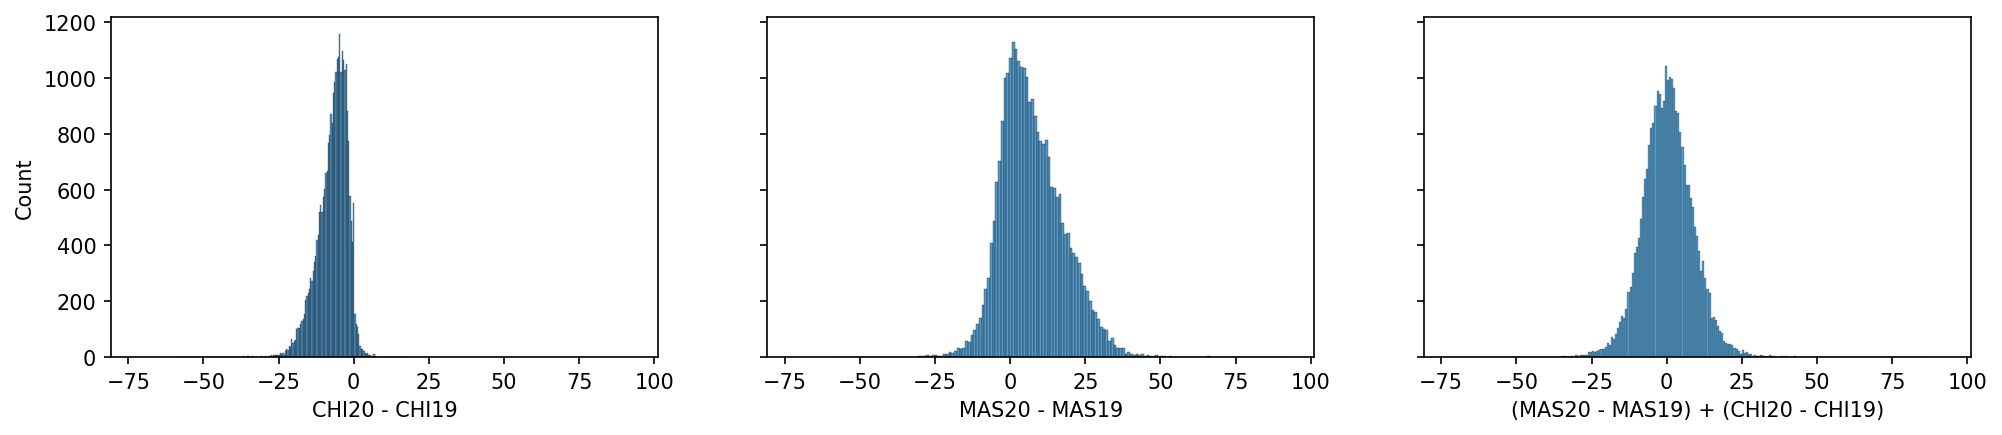

In [44]:
f,axs = plt.subplots(1,3,figsize=[16,3],sharex=True,sharey=True,dpi=150)
axf = axs.flatten()
sns.histplot(df[DCHI], ax=axf[0])
sns.histplot(df[DMAS], ax=axf[1])
sns.histplot(df[DMAS_M_DCHI], ax=axf[2]);

In [69]:
df

,ID_RECI_19,HAB_19,CC_19,MAS_19,21F,PDC,VV_19,BL_19,NL,X_19,...,chi_20,chi_19,CHI20 - CHI19,cc_20,cc_19,dcc,(MAS20 - MAS19) + (CHI20 - CHI19),xj,yj,s
ID_MESA,,,,,,,,,,,,,,,,,,,,,
100320836730000101,1003208367300001,6,1,1,0,0,3,0,0,-62.461213,...,NaN,0.000000,NaN,NaN,33.333333,NaN,NaN,-62.628917,-11.681247,0.013333
111076838112513601,1110768381125136,9,0,5,0,0,5,2,0,-51.348628,...,0.000000,0.000000,0.000000,25.000000,0.000000,25.000000,-25.000000,-51.905861,-12.915614,0.013333
100320825890000101,1003208258900001,5,0,1,2,0,3,0,0,-64.869202,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.666667,-64.987445,-11.889908,0.012472
110636738102513501,1106367381025135,14,4,6,0,0,10,0,0,-52.178152,...,0.000000,0.000000,0.000000,57.142857,40.000000,17.142857,-17.142857,-52.721969,-11.623516,0.016330
100320735550000101,1003207355500001,13,1,12,0,0,13,0,0,-57.507294,...,0.000000,0.000000,0.000000,0.000000,7.692308,-7.692308,0.549451,-57.812866,-17.852669,0.017638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100320208200040120,1003202082000401,226,31,126,1,35,202,2,10,-69.476815,...,2.030457,17.326733,-15.296276,11.167513,15.346535,-4.179022,7.606674,-69.643096,-13.274949,0.069921
100320208200040119,1003202082000401,225,35,122,5,30,199,1,13,-69.476815,...,4.433498,15.075377,-10.641879,16.256158,17.587940,-1.331782,7.361933,-69.800889,-13.641571,0.069921
100320208200040116,1003202082000401,219,44,114,2,26,195,1,8,-69.476815,...,0.505051,13.333333,-12.828283,18.686869,22.564103,-3.877234,8.003108,-69.525652,-13.435499,0.069921
